**Exploratory Data Analysis for the Recruit Restaurant Visitor Forecasting competition using Python Notebook.
Currently it covers only visualization of individual dataset. 
As time passes, i will add Insights and more visualization, then features creation. Thanks**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import datetime
import calendar
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Any results you write to the current directory are saved as output.

## Load Files

In [2]:
#Load all Files
data_load = {
    'air_reserve': pd.read_csv('Data/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime']), 
    'hpg_reserve': pd.read_csv('Data/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime']), 
    'air_store': pd.read_csv('Data/air_store_info.csv'),
    'hpg_store': pd.read_csv('Data/hpg_store_info.csv'),
    'air_visit': pd.read_csv('Data/air_visit_data.csv',parse_dates=['visit_date']),
    'store_id': pd.read_csv('Data/store_id_relation.csv'),
    'sample_sub': pd.read_csv('Data/sample_submission.csv'),
    'holiday_dates': pd.read_csv('Data/date_info.csv',parse_dates=['calendar_date']).rename(columns={'calendar_date':'visit_date'})
    }

### **Data Snapshots**

In [39]:
data_load['store_id'].head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [3]:
# Air Reserve: reservations made in the air system
data_load['air_reserve'].head()
# std	4.92 # min	1.00 # 25%	2.00 # 50%	3.00 # 75%	5.00 # max	100.00

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
#hpg_reserve: reservations made in the hpg system
data_load['hpg_reserve'].head()
# mean	5.07 # std	5.42 # min	1.00 # 25%	2.00 # 50%	3.00 # 75%	6.00 # max	100.00

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [16]:
data_load['air_store'].head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.70,135.20
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.66,139.75


In [6]:
#air_store: information about select air restaurants
data_load['air_store'].describe(include = ['O'])

,air_store_id,air_genre_name,air_area_name
count,829,829,829
unique,829,14,103
top,air_8764b3473ddcceaf,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō
freq,1,197,64


In [7]:
#hpg_store: information about select hpg restaurants
data_load['hpg_store'].describe(include = ['O'])

,hpg_store_id,hpg_genre_name,hpg_area_name
count,4690,4690,4690
unique,4690,34,119
top,hpg_02480b0c4f9e21ea,Japanese style,Tōkyō-to Shinjuku-ku None
freq,1,1750,257


In [8]:
#air_visit : historical visit data for the air restaurants.
data_load['air_visit'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [9]:
#holiday_dates: basic information about the calendar dates in the dataset.
data_load['holiday_dates'].head(5)

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [10]:
# Submission only contains Air id
data_load['sample_sub'].head(1)

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0


In [11]:
# Removing concat from air id and date
data_load['sample_sub']['air_store_id'] = data_load['sample_sub']['id'].apply(lambda x: '_'.join(x.split('_')[:2]))
data_load['sample_sub']['visit_date'] = data_load['sample_sub']['id'].apply(lambda x: x.split('_')[-1])

In [12]:
data_load['sample_sub'].head(1)

,id,visitors,air_store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23


## **Feature Visualizations**

### **Air Data**

In [13]:
#Visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from datetime import datetime

Text(0.5,1,'Visitor each day')

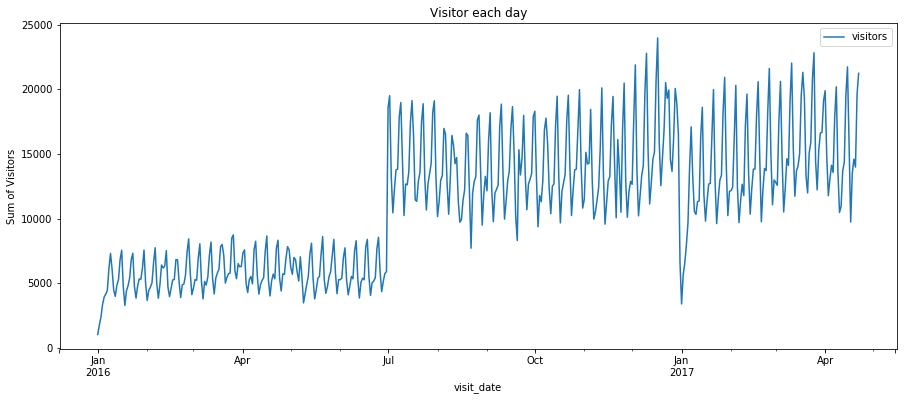

In [14]:
#Visitor each day
plt1 = data_load['air_visit'].groupby(['visit_date'], as_index=False).agg({'visitors': np.sum})
plt1=plt1.set_index('visit_date')
plt1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")

In [25]:
data_load['air_visit']['visitors'].value_counts()

8      8685
6      8684
10     8543
9      8532
7      8521
11     8107
12     8012
4      8004
5      7732
13     7673
14     7390
2      7230
16     7227
15     7208
17     6626
18     6504
3      6412
19     6112
20     6023
21     5644
22     5531
23     5277
24     4917
1      4811
25     4651
26     4626
27     4289
28     3990
29     3887
30     3757
       ... 
514       1
305       1
166       1
176       1
175       1
311       1
205       1
235       1
217       1
201       1
335       1
148       1
209       1
147       1
211       1
409       1
170       1
145       1
328       1
202       1
218       1
348       1
199       1
222       1
269       1
351       1
189       1
188       1
229       1
216       1
Name: visitors, Length: 204, dtype: int64

In [26]:
data_load['air_visit']['visitors'].value_counts().reset_index()

,index,visitors
0,8,8685
1,6,8684
2,10,8543
3,9,8532
4,7,8521
5,11,8107
6,12,8012
7,4,8004
8,5,7732
9,13,7673


In [28]:
data_load['air_visit']['visitors'].value_counts().reset_index().sort_index()

,index,visitors
0,8,8685
1,6,8684
2,10,8543
3,9,8532
4,7,8521
5,11,8107
6,12,8012
7,4,8004
8,5,7732
9,13,7673


Text(0.5,0,'Number of People in a visit')

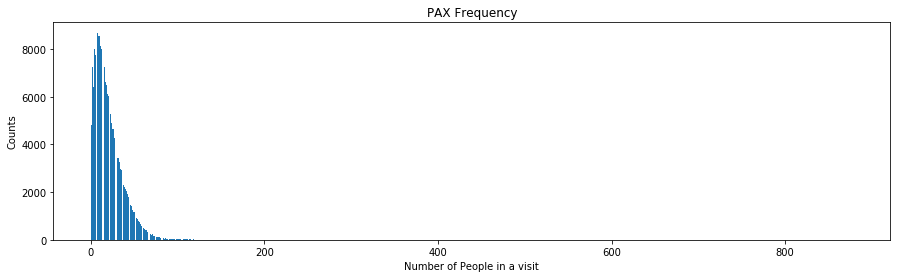

In [20]:
# Pax Frequency: Count of visit with 'x' visitor
plt2=data_load['air_visit']['visitors'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots()
ax.bar(plt2['index'] ,plt2['visitors'])
fig.set_size_inches(15,4, forward=True)
ax.set_title("PAX Frequency")
ax.set_ylabel('Counts')
ax.set_xlabel('Number of People in a visit')

In [29]:
#Median number of visitor in day of a week
data_load['air_visit']['dow']=data_load['air_visit']['visit_date'].apply(lambda x: calendar.day_name[x.weekday()])
plt3 = data_load['air_visit'].groupby(['dow'], as_index=False).agg({'visitors': np.median})
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
mapping = {day: i for i, day in enumerate(days)}
key = plt3['dow'].map(mapping)
plt3 = plt3.iloc[key.argsort()].set_index('dow').reset_index()

#Median number of visitor in Month of a Year
data_load['air_visit']['Month']=data_load['air_visit']['visit_date'].apply(lambda x: calendar.month_name[x.month])
plt4 = data_load['air_visit'].groupby(['Month'], as_index=False).agg({'visitors': np.median})
Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
mapping = {Month: i for i, Month in enumerate(Months)}
key = plt4['Month'].map(mapping)
plt4 = plt4.iloc[key.argsort()].set_index('Month').reset_index()


/home/jaromir/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


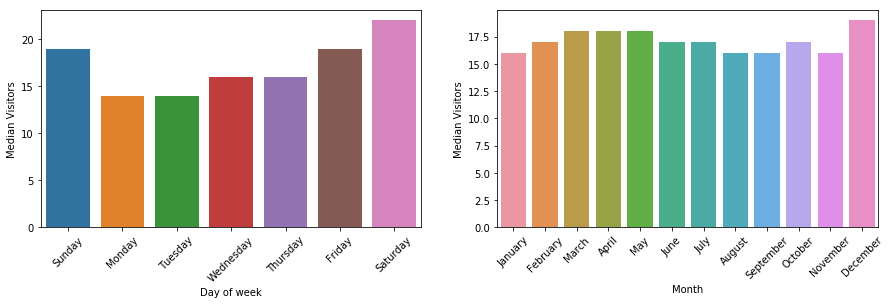

In [30]:
#plot
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,4, forward=True)

sns.barplot(x="dow",y="visitors",data=plt3,ax=ax[0])
sns.barplot(x="Month",y="visitors",data=plt4,ax=ax[1])
ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Median Visitors')
ax[1].set_ylabel('Median Visitors')
for ax in ax:
    for label in ax.get_xticklabels():
        label.set_rotation(45) 

In [ ]:
# Obesrvation pending

### **Air Reservation**

In [31]:
data_load['air_reserve'].head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


Text(0.5,1,'Visitor each day')

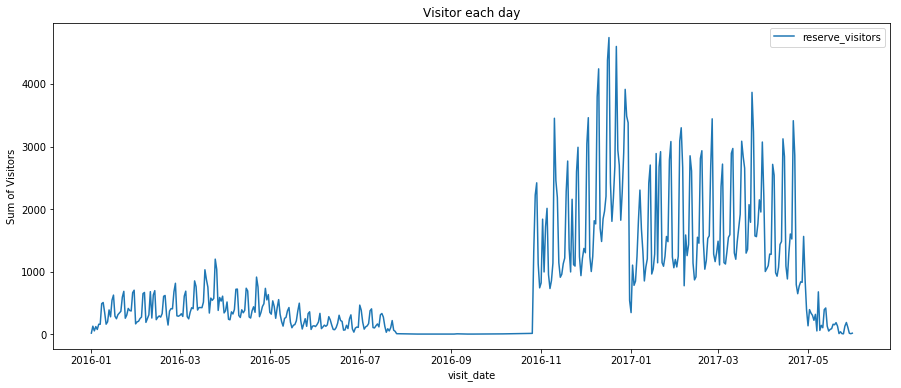

In [32]:
# Compare Reservation data to Visitor data
#Visitor each day
data_load['air_reserve']['visit_date']=data_load['air_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['air_reserve']['reserve_date']=data_load['air_reserve']['reserve_datetime'].apply(lambda x: x.date())
airR1 = data_load['air_reserve'].groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.sum})
airR1=airR1.set_index('visit_date')
airR1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")

In [33]:
data_load['air_reserve']['visit_hr']=data_load['air_reserve']['visit_datetime'].apply(lambda x: x.time().hour)
data_load['air_reserve']['reserve_hr']=data_load['air_reserve']['reserve_datetime'].apply(lambda x: x.time().hour)
data_load['air_reserve']['diff_hr']=(data_load['air_reserve']['visit_datetime']-data_load['air_reserve']['reserve_datetime']).apply(lambda x : x.total_seconds()/3600)
airR2 = data_load['air_reserve'].groupby(['visit_hr'], as_index=False).agg({'reserve_visitors': np.sum})
airR3 = data_load['air_reserve'].groupby(['diff_hr'], as_index=False).agg({'reserve_visitors': np.sum})

/home/jaromir/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


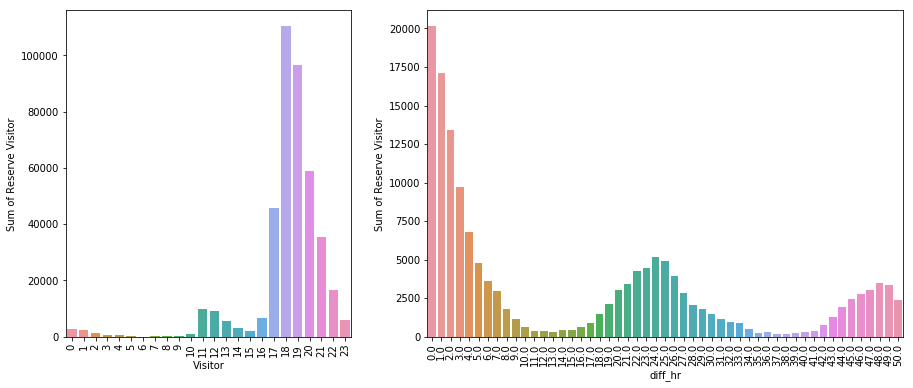

In [34]:
#plot
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 2.5]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
sns.barplot(x="visit_hr",y="reserve_visitors",data=airR2,ax=ax0)
sns.barplot(x="diff_hr",y="reserve_visitors",data=airR3[(airR3['diff_hr'] <= 50)],ax=ax1)
ax0.set_xlabel('Visitor')
ax0.set_ylabel('Sum of Reserve Visitor')
ax1.set_ylabel('Sum of Reserve Visitor')
for ax in [ax0,ax1]:
    for label in ax.get_xticklabels():
        label.set_rotation(90) 

### **HPG Reservation**

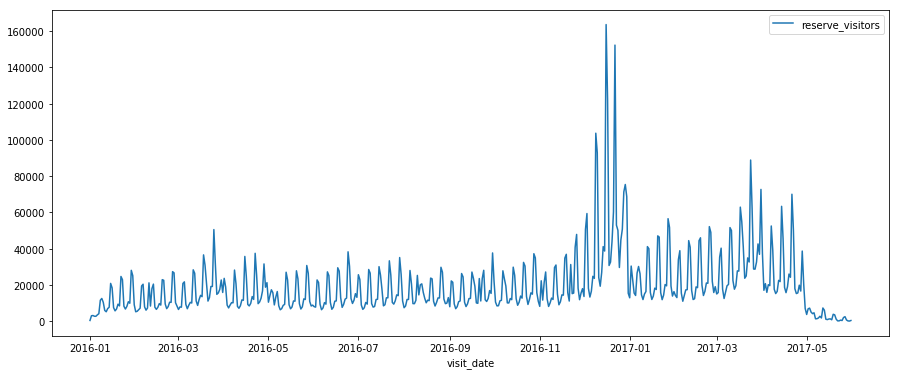

In [35]:
# Compare Reservation data to Visitor data
#Visitor each day
data_load['hpg_reserve']['visit_date']=data_load['hpg_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['hpg_reserve']['reserve_date']=data_load['hpg_reserve']['reserve_datetime'].apply(lambda x: x.date())
hpgR1 = data_load['hpg_reserve'].groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.sum})
hpgR1=hpgR1.set_index('visit_date')
hpgR1.plot(figsize=(15, 6))

/home/jaromir/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


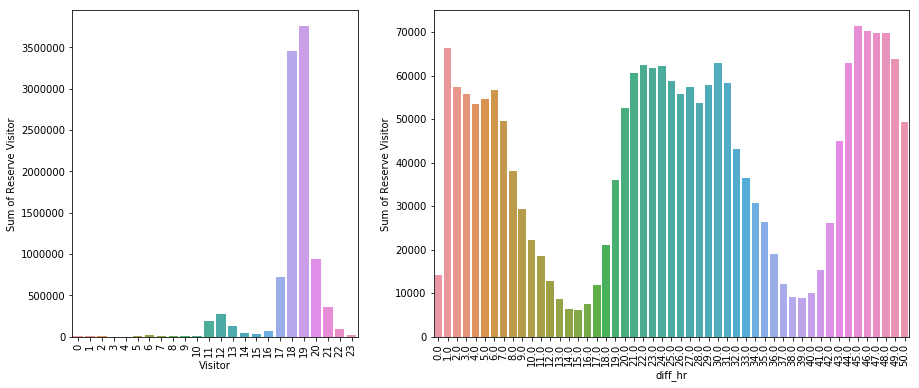

In [36]:
data_load['hpg_reserve']['visit_hr']=data_load['hpg_reserve']['visit_datetime'].apply(lambda x: x.time().hour)
data_load['hpg_reserve']['reserve_hr']=data_load['hpg_reserve']['reserve_datetime'].apply(lambda x: x.time().hour)
data_load['hpg_reserve']['diff_hr']=(data_load['hpg_reserve']['visit_datetime']-data_load['hpg_reserve']['reserve_datetime']).apply(lambda x : x.total_seconds()/3600)
hpgR2 = data_load['hpg_reserve'].groupby(['visit_hr'], as_index=False).agg({'reserve_visitors': np.sum})
hpgR3 = data_load['hpg_reserve'].groupby(['diff_hr'], as_index=False).agg({'reserve_visitors': np.sum})
#plot
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 2.5]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
sns.barplot(x="visit_hr",y="reserve_visitors",data=hpgR2,ax=ax0)
sns.barplot(x="diff_hr",y="reserve_visitors",data=hpgR3[(hpgR3['diff_hr'] <= 50)],ax=ax1)
ax0.set_xlabel('Visitor')
ax0.set_ylabel('Sum of Reserve Visitor')
ax1.set_ylabel('Sum of Reserve Visitor')
for ax in [ax0,ax1]:
    for label in ax.get_xticklabels():
        label.set_rotation(90) 

/home/jaromir/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Number of Restaurent')

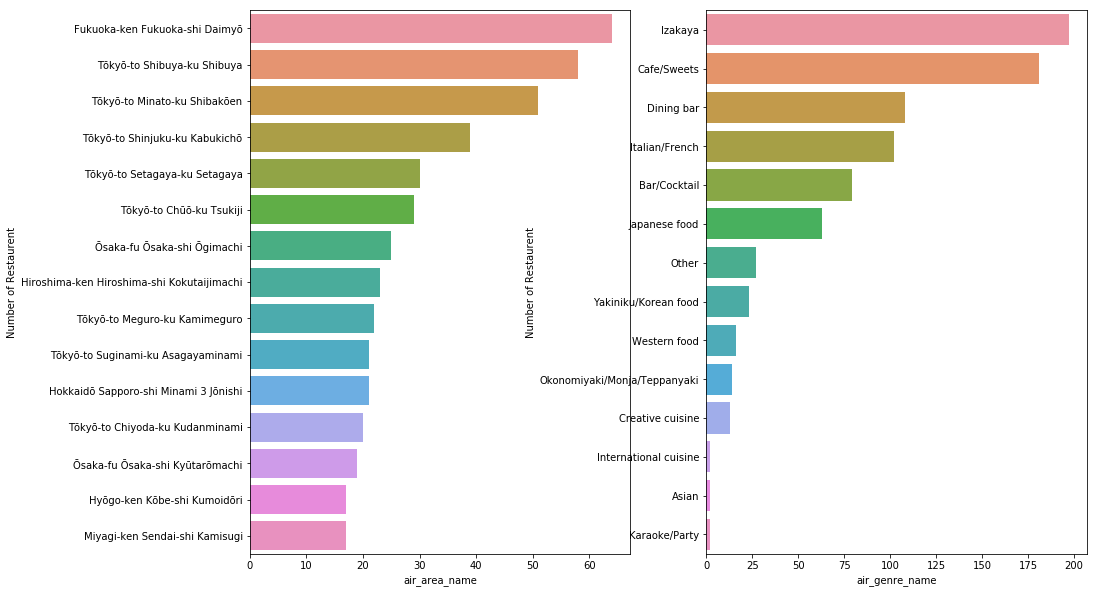

In [37]:
# Number of restaurent in area: Air Data
airS1=data_load['air_store']['air_area_name'].value_counts().reset_index().sort_index()
airS2=data_load['air_store']['air_genre_name'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots(1,2)
sns.barplot(y='index' ,x='air_area_name',data=airS1.iloc[:15],ax=ax[0])
sns.barplot(y='index' ,x='air_genre_name',data=airS2.iloc[:15],ax=ax[1])
fig.set_size_inches(15,10, forward=True)
ax[0].set_ylabel('Number of Restaurent')
ax[1].set_ylabel('Number of Restaurent')

/home/jaromir/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Number of Restaurent')

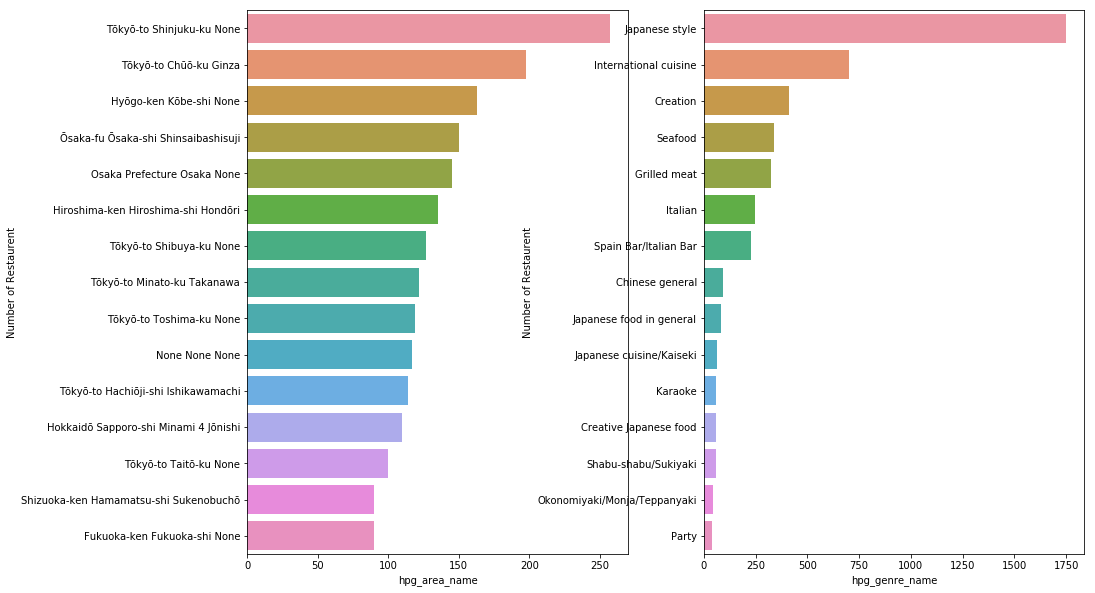

In [38]:
# Number of restaurent in area: HPG store
hpgS1=data_load['hpg_store']['hpg_area_name'].value_counts().reset_index().sort_index()
hpgS2=data_load['hpg_store']['hpg_genre_name'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots(1,2)
sns.barplot(y='index' ,x='hpg_area_name',data=hpgS1.iloc[:15],ax=ax[0])
sns.barplot(y='index' ,x='hpg_genre_name',data=hpgS2.iloc[:15],ax=ax[1])
fig.set_size_inches(15,10, forward=True)
ax[0].set_ylabel('Number of Restaurent')
ax[1].set_ylabel('Number of Restaurent')